# Restricted Boltzmann Machine
##### MNIST reconstruction using numpy

Import dependencies

In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

### Util functions

function to plot the images after during testing phase

In [2]:
def plot_images(images, title, no_i_x, no_i_y=2):
    fig = plt.figure(figsize=(5, 15))
    fig.canvas.set_window_title(title)
    images = np.array(images).reshape(-1, 28, 28)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Reconstructed")

load the mnist dataset from tensorflow.examples

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
features_train, labels_train, features_test, labels_test = \
    mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Neural Network

<br>Hyper-parameters

In [4]:
n_input_layer = features_train.shape[1]
n_hidden_layer = 500

learning_rate = 1.0

n_epoch = 10
batch_size = 100

test_disp = 10  # no of images in plot

Sigmoid function

In [5]:
def sigmoid(inp):
    return 1.0 / (1.0 + np.exp(-inp))

function to get random sample from input

In [6]:
def get_sample(inp):
    distr = np.random.uniform(size=inp.shape)
    sample = 1.0 * (np.sign(inp - distr) > 0)
    return sample

#### Function to train network 
using contrastive-divergence-k(k = 1)

In [7]:
def train(inp, w, b, c):
    # Forward pass
    p_h = sigmoid(np.dot(inp, w) + b)
    s_h = get_sample(p_h)

    # Backward pass
    p_v = sigmoid(np.dot(s_h, w.T) + c)
    s_v = get_sample(p_v)

    p_h1 = sigmoid(np.dot(s_v, w) + b)

    # Error function
    error = np.mean(0.5 * np.square(s_v - inp))

    # Positive phase grad
    p_w_change = np.dot(inp.T, s_h)

    # Negative phase grad
    n_w_change = np.dot(s_v.T, p_h1)

    contr_div = (p_w_change - n_w_change) / inp.shape[0]

    change_w = contr_div
    change_c = np.mean(inp - s_v, 0)
    change_b = np.mean(s_h - p_h1, 0)

    return error, change_w, change_b, change_c

#### Function to regenerate image from input

In [8]:
def regenerate(inp, w, b, c):
    hid = sigmoid(np.dot(inp, w) + b)
    rc = sigmoid(np.dot(hid, w.T) + c)
    return rc

### Train Neural Network

Initialize random  Weights and biases

In [9]:
W = np.random.uniform(0.1, size=(n_input_layer, n_hidden_layer))
B = np.random.uniform(0.1, size=n_hidden_layer)
C = np.random.uniform(0.1, size=n_input_layer)

split into batches

In [10]:
X = features_train
n_batch = X.shape[0] // batch_size
X = np.split(X, n_batch)

train the network

In [11]:
print("*********** Train ***********")

# Epoch-training
for epoch in range(n_epoch):
    err = []

    # Batch training
    for b_idx in range(n_batch):
        x = X[b_idx]
        e, grad_w, grad_b, grad_c = train(x, W, B, C)

        # Adjust Weights
        W += learning_rate * grad_w
        B += learning_rate * grad_b
        C += learning_rate * grad_c

        err.append(e)

    print("Epoch: %d, Error: %.8f" % (epoch, sum(err) / len(err)))

*********** Train ***********
Epoch: 0, Error: 0.04810881
Epoch: 1, Error: 0.03667327
Epoch: 2, Error: 0.03323167
Epoch: 3, Error: 0.03122020
Epoch: 4, Error: 0.02987828
Epoch: 5, Error: 0.02887069
Epoch: 6, Error: 0.02806680
Epoch: 7, Error: 0.02738257
Epoch: 8, Error: 0.02690064
Epoch: 9, Error: 0.02649677


### Reconstruction

In [12]:
disp_imgs = []
for i_no in range(test_disp):
    disp_imgs.append(features_test[i_no])
    disp_imgs.append(regenerate(features_test[i_no], W, B, C))

#### plot output

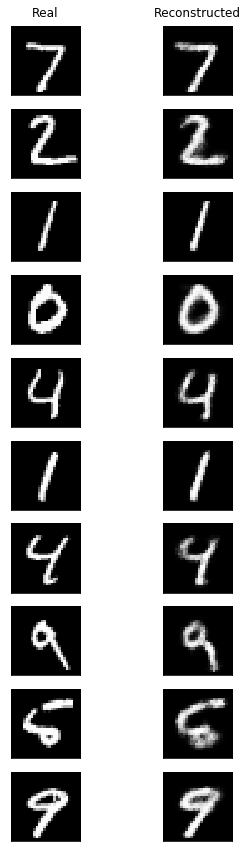

In [13]:
plot_images(disp_imgs, "Restricted Boltzmann Machine", test_disp)
plt.show()